Support Vector Machines (SVM) is a powerful supervised machine learning algorithm widely used for classification and regression tasks. It works by finding the best hyperplane or decision boundary that separates different classes in a dataset, making it one of the most effective algorithms for high-dimensional spaces. Here's a breakdown of what SVM is, how it works, its applications, benefits, limitations, and the necessary libraries for using it.

### What is SVM and How Does It Work?

SVM primarily focuses on finding the **optimal hyperplane** that maximally separates the classes in a dataset. The goal is to find a hyperplane with the **maximum margin** — the greatest distance between the closest points of different classes, known as support vectors. By maximizing this margin, SVM aims to increase the model’s ability to generalize to unseen data.

1. **Linear SVM**:
   - In cases where the data is linearly separable (where a straight line or flat hyperplane can separate classes), SVM will find the hyperplane with the maximum margin to separate the classes.
   - For example, in a 2D space, this boundary will be a line; in 3D, it will be a plane.

2. **Non-linear SVM**:
   - When data is not linearly separable, SVM uses a technique called the **kernel trick** to map data into a higher-dimensional space where it becomes linearly separable.
   - The **kernel functions** (e.g., linear, polynomial, radial basis function (RBF)) transform the data to allow complex boundaries in the original space.
   - RBF, for instance, is often used because it effectively handles non-linear relationships in the data.

### Key Concepts

- **Support Vectors**: Data points closest to the hyperplane, which directly influence its position and orientation.
- **Margin**: The distance between the hyperplane and the closest support vectors from each class. Maximizing the margin improves the model's generalization.
- **Hyperplane**: The decision boundary that separates classes. In 2D, this is a line, and in 3D, it’s a plane. For higher dimensions, it becomes a hyperplane.

### Applications of SVM

SVM is used across various domains because of its versatility and ability to handle both linear and non-linear data:

1. **Image Classification**: SVM is popular for image classification tasks, such as facial recognition or object detection.
2. **Text and Sentiment Analysis**: Widely used in Natural Language Processing (NLP) for spam detection, sentiment analysis, and text classification.
3. **Bioinformatics**: Useful for classifying gene expression data, protein classification, and other biological classification tasks.
4. **Handwriting Recognition**: SVM can distinguish between different handwritten characters due to its classification abilities.
5. **Financial Analysis**: Used to detect fraud, classify stock market trends, and other financial risk analyses.

### Pros and Cons of SVM

#### Pros

- **Effective in High Dimensions**: SVM performs well in cases with a large number of features or high-dimensional spaces, as it only relies on support vectors rather than the full dataset.
- **Versatile (Linear and Non-linear)**: SVM can classify both linearly separable and non-linearly separable data using kernel functions.
- **Memory Efficient**: Only support vectors are used in the decision function, which makes SVM memory efficient.
- **Robust to Outliers**: Through regularization (C parameter), SVM can control the trade-off between maximizing the margin and minimizing classification error, which helps in handling outliers.
  
#### Cons

- **High Computational Cost**: SVM can be computationally intensive for large datasets, especially with complex kernel functions.
- **Sensitive to Kernel Choice**: Choosing the wrong kernel can negatively impact performance. Selecting the right kernel requires expertise and experimentation.
- **Less Effective with Overlapping Classes**: If the classes are not well-separated, SVM might struggle, particularly if there’s significant overlap or noise in the data.
- **Hard to Interpret**: While SVM works well for predictions, it is less interpretable compared to simpler models like decision trees, especially with complex kernels.

### Needed Libraries

To use SVM, Python offers powerful libraries that make implementation easier:

1. **scikit-learn (sklearn)**: Provides a highly optimized SVM implementation with a variety of kernels and parameters. It’s the go-to library for SVM in Python.
   - `SVC` for classification tasks.
   - `SVR` for regression tasks.
   
2. **NumPy**: For handling numerical operations and creating feature matrices.

3. **Pandas**: For data manipulation and preprocessing tasks, commonly used to clean and format the data before applying SVM.

4. **Matplotlib and Seaborn**: For visualizing data and results. Useful for plotting decision boundaries and understanding SVM behavior in low-dimensional datasets.

### Benefits of SVM

- **Excellent Generalization**: SVM, by focusing on the margin, tends to generalize well on unseen data, which is a key strength.
- **Effective in High Dimensions**: The algorithm works efficiently with high-dimensional datasets, which is especially useful in areas like text classification.
- **Customizable with Kernels**: Kernels allow SVM to adapt to different types of data structures, making it flexible for both linear and non-linear problems.
- **Support for Binary and Multi-class Classification**: SVM can classify binary as well as multi-class problems (with techniques like one-vs-rest or one-vs-one strategies in sklearn).

SVM is particularly powerful when high accuracy is required, and computational resources are available to support training. It is often used in scenarios where classes are clearly separable or where non-linearity can be addressed by an appropriate kernel, making it effective in complex classification tasks.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
len(iris.data)

150

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
df[iris.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df[iris.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [13]:
df[iris.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [14]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [16]:
df[95:105]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor
99,5.7,2.8,4.1,1.3,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [17]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

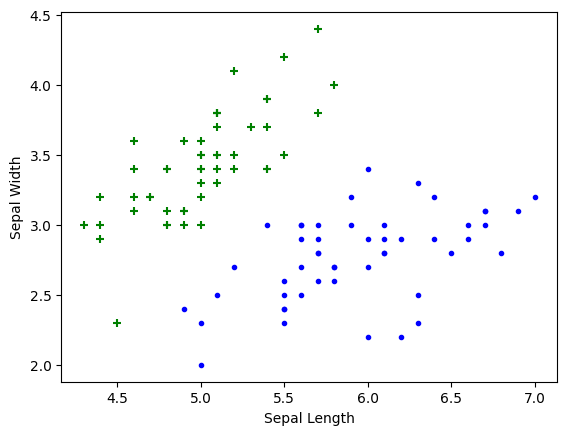

In [18]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')
#plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', marker='*')

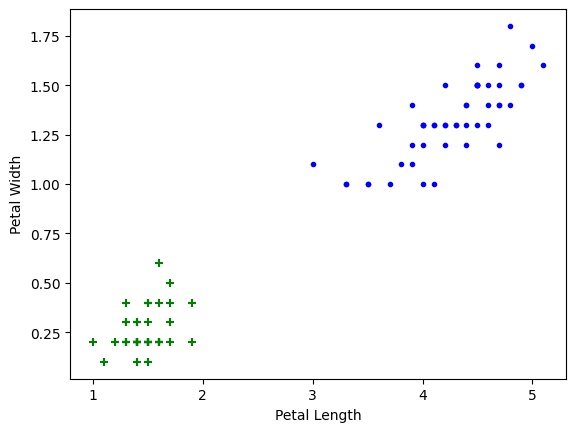

In [19]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='.')
#plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red', marker='*')

In [20]:
X = df.drop(['target', 'flower_name'], axis='columns')
y = df.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
len(X_train)

120

In [23]:
len(X_test)

30

In [24]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [25]:
model.score(X_test, y_test)

0.9

In [26]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
65,6.7,3.1,4.4,1.4
97,6.2,2.9,4.3,1.3
128,6.4,2.8,5.6,2.1
11,4.8,3.4,1.6,0.2
85,6.0,3.4,4.5,1.6
3,4.6,3.1,1.5,0.2
109,7.2,3.6,6.1,2.5
116,6.5,3.0,5.5,1.8
82,5.8,2.7,3.9,1.2
92,5.8,2.6,4.0,1.2


In [27]:
model.predict(X_test)

array([1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2,
       1, 1, 0, 0, 2, 0, 1, 2])

In [28]:
model.predict([[5.5, 2.5,4.0,1.3]])

C:\Users\Al hamad\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [29]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

In [30]:
model_g = SVC(gamma=5)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

1.0

In [31]:
model_linear_kernal = SVC(kernel = 'linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

0.9

## Exercise

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

Measure accuracy of your model using different kernels such as rbf and linear.

Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score, Use 80% of samples as training data size.

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()

In [33]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [34]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [35]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

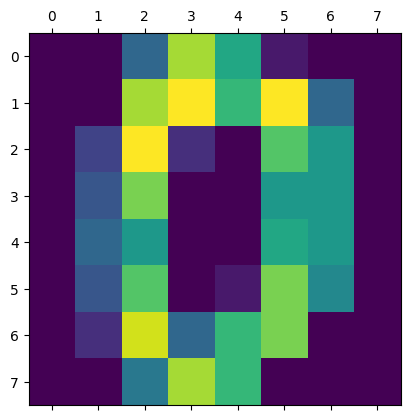

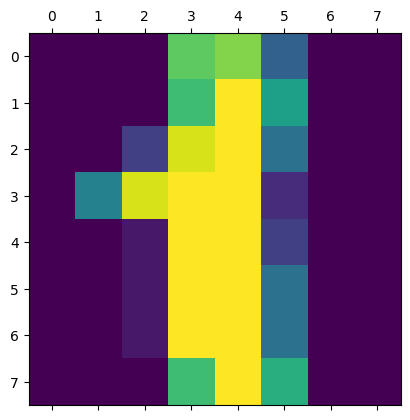

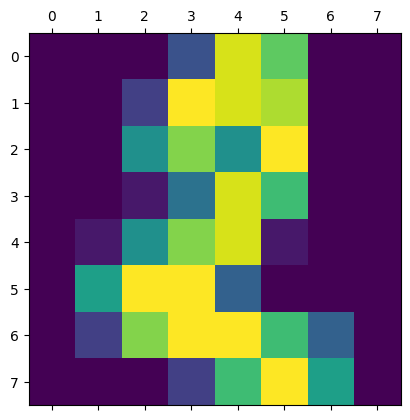

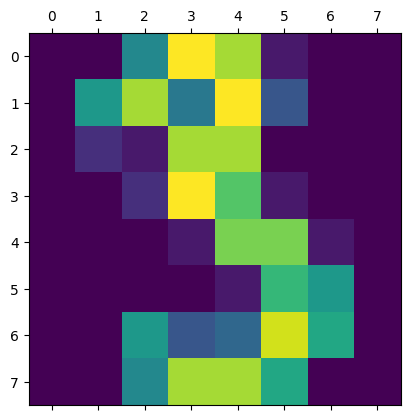

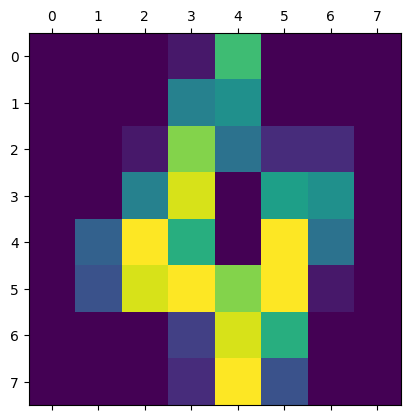

In [36]:
#plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [37]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [38]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [39]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [40]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
digits.feature_names[:5]

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']

In [42]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [43]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [44]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [46]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [47]:
X = df.drop('target', axis='columns')
y = df.target

In [48]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [49]:
y.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [51]:
len(X)

1797

In [52]:
len(X_train)

1437

In [53]:
len(X_test)

360

In [54]:
model_digit = SVC()
model_digit.fit(X_train, y_train)

SVC()

In [55]:
model_digit.score(X_test, y_test)

0.9916666666666667

In [56]:
model_digit_linear = SVC(kernel = 'linear')
model_digit_linear.fit(X_train, y_train)
model_digit_linear.score(X_test, y_test)

0.9916666666666667

In [57]:
model_digit_rbf = SVC(kernel = 'rbf')
model_digit_rbf.fit(X_train, y_train)
model_digit_rbf.score(X_test, y_test)

0.9916666666666667

In [58]:
model_digit_C = SVC(C=6)
model_digit_C.fit(X_train, y_train)
model_digit_C.score(X_test, y_test)

0.9944444444444445

In [59]:
model_digit_g = SVC(gamma=1)
model_digit_g.fit(X_train, y_train)
model_digit_g.score(X_test, y_test)

0.075

In [60]:
model_digit_g = SVC(gamma=9)
model_digit_g.fit(X_train, y_train)
model_digit_g.score(X_test, y_test)

0.075

## Example 2
I have used the Predicting a Pulsar Star dataset for this project.

In [61]:
data = pd.read_csv("pulsar_stars.csv")
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [62]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [64]:
data.shape

(17898, 9)

In [65]:
col_names = data.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [66]:
col_names = col_names.str.strip()
col_names

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [67]:
data.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [68]:
data.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

you can see that the column names are shortened. IP stands for integrated profile and DM-SNR stands for delta modulation and signal to noise ratio.

In [69]:
data['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [70]:
data['target_class'].shape

(17898,)

In [71]:
# view the percentage distribution of target_class column
data['target_class'].value_counts() / float(len(data))

target_class
0    0.908426
1    0.091574
Name: count, dtype: float64

In [72]:
data.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [73]:
# view summary statistics in numerical variables
round(data.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'DM-SNR Skewness')

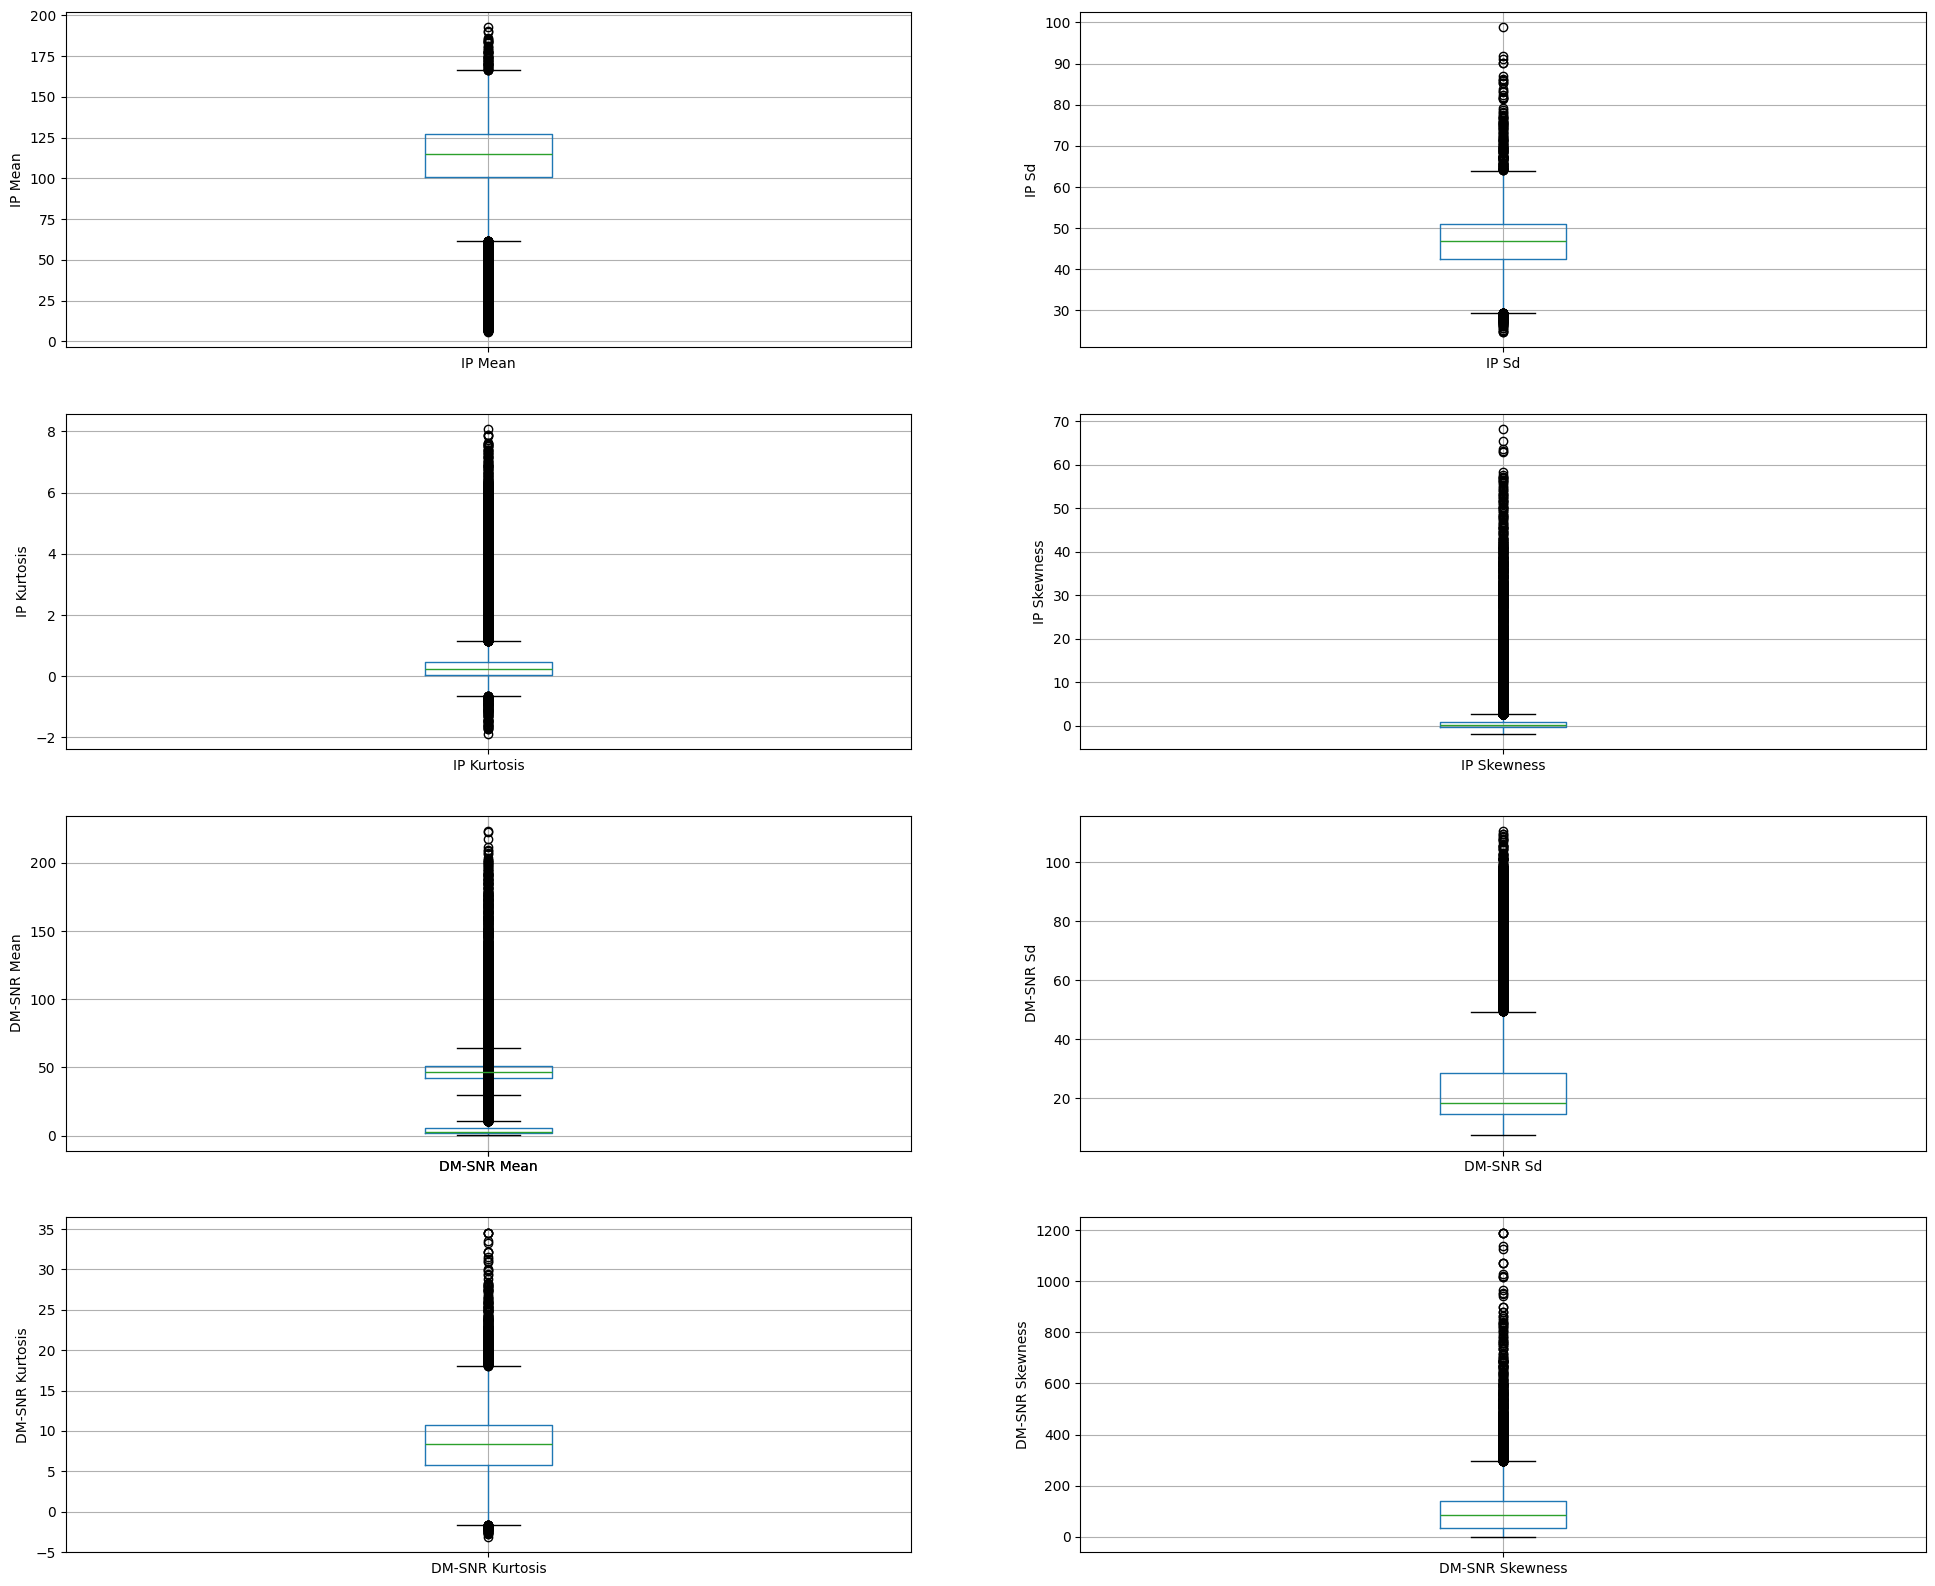

In [74]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = data.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel("IP Mean")

plt.subplot(4, 2, 2)
fig = data.boxplot(column="IP Sd")
fig.set_title('')
fig.set_ylabel("IP Sd")

plt.subplot(4, 2, 3)
fig = data.boxplot(column="IP Kurtosis")
fig.set_title('')
fig.set_ylabel("IP Kurtosis")

plt.subplot(4, 2, 4)
fig = data.boxplot(column="IP Skewness")
fig.set_title('')
fig.set_ylabel("IP Skewness")

plt.subplot(4, 2, 5)
fig = data.boxplot(column="IP Sd")
fig.set_title('')
fig.set_ylabel("IP Sd")

plt.subplot(4, 2, 5)
fig = data.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = data.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = data.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = data.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Checking the distribution of variables.

Text(0, 0.5, 'Number of pulsar stars')

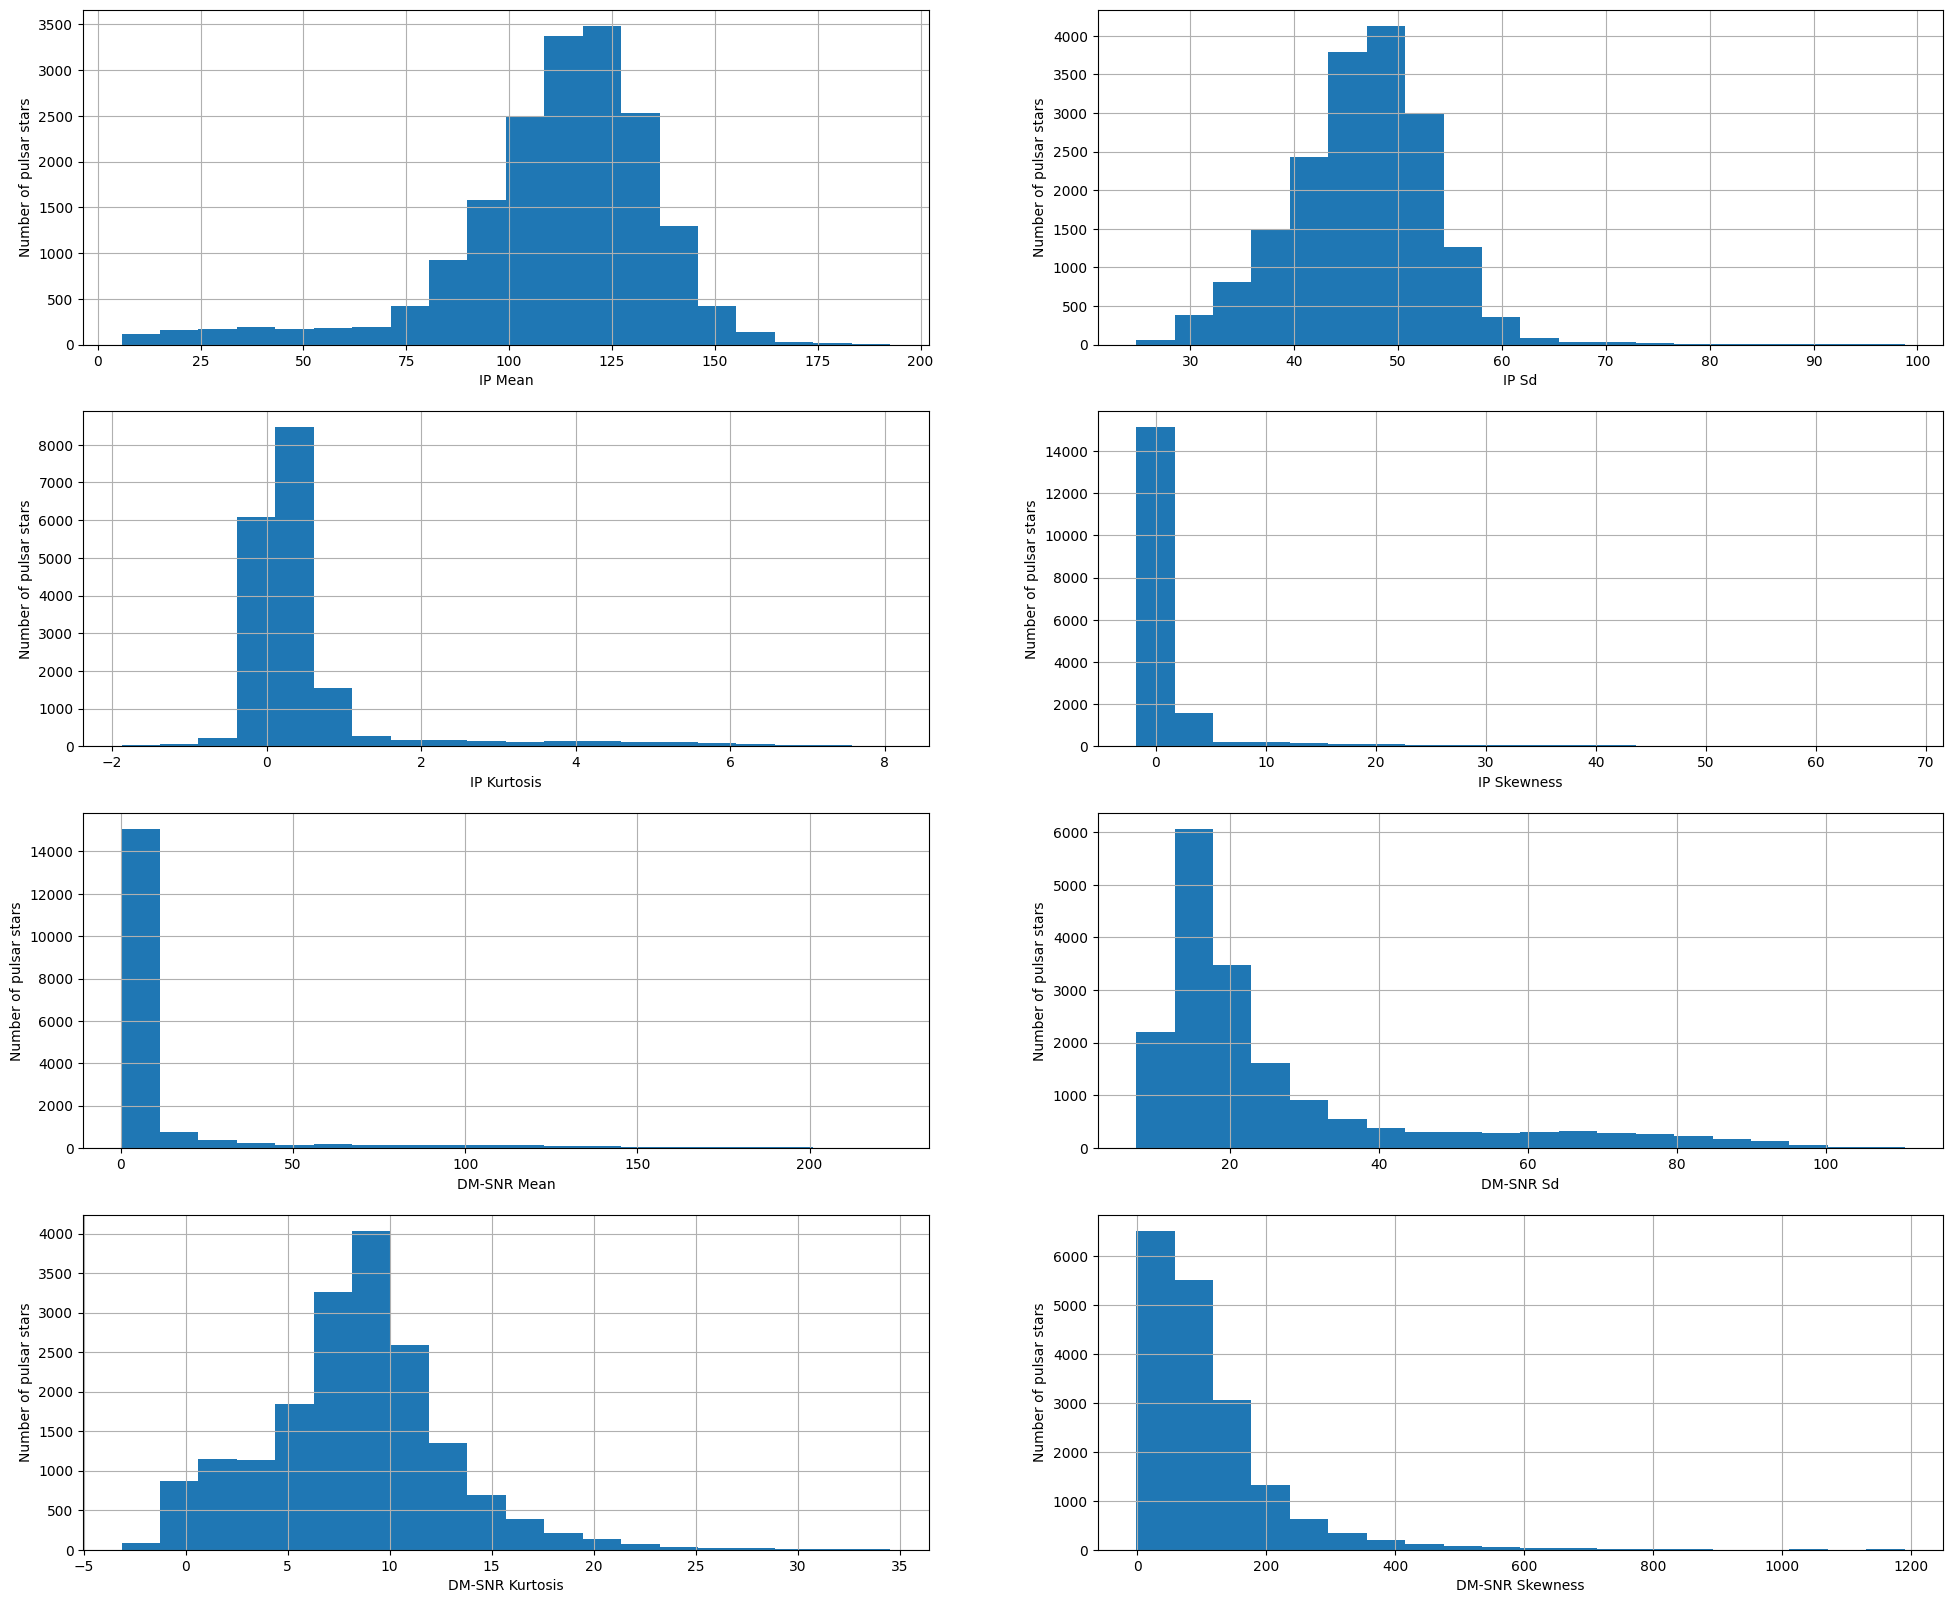

In [75]:
# plot histogram to check distribution
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = data['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = data['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = data['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = data['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = data['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = data['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = data['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = data['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

In [76]:
X = data.drop(['target_class'], axis='columns')
y = data['target_class']

In [77]:
X.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [78]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_class, dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [80]:
len(X_train)

14318

In [81]:
len(X)

17898

lets do some Feature Scaling 

In [82]:
cols = X_train.columns

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [85]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,-1.047105e-16,2.074360e-16,1.488775e-17,-1.191020e-17,6.997243e-17,-7.443876e-17,5.359590e-17,-3.374557e-17
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.137707e+00,-3.168901e+00,-2.237243e+00,-5.827961e-01,-4.200978e-01,-9.757424e-01,-2.461176e+00,-9.959632e-01
25%,-3.951445e-01,-6.064013e-01,-4.235972e-01,-3.178578e-01,-3.615482e-01,-6.103620e-01,-5.613246e-01,-6.517861e-01
50%,1.518495e-01,5.624978e-02,-2.378276e-01,-2.541246e-01,-3.317465e-01,-4.035989e-01,2.641826e-02,-2.044631e-01
75%,6.246476e-01,6.544059e-01,-7.821399e-04,-1.347484e-01,-2.415798e-01,1.095258e-01,5.224976e-01,3.121043e-01
max,3.200868e+00,7.610096e+00,7.237745e+00,1.098995e+01,7.181162e+00,4.345173e+00,5.806138e+00,1.011662e+01


Running SVM with default hyperparameters 

In [86]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [87]:
model.score(X_test, y_test)

0.9801675977653631

In [88]:
y_pred = model.predict(X_test)
y_pred
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9802


In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3233
           1       0.95      0.84      0.89       347

    accuracy                           0.98      3580
   macro avg       0.97      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



**Runing SVM with rbf kernel and C=100.0**

In [90]:
model_C = SVC(C=100)
model_C.fit(X_train,y_train)

SVC(C=100)

In [91]:
model_C.score(X_test, y_test)

0.9807262569832402

In [92]:
y_pred_c = model_C.predict(X_test)
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_c)))

Model accuracy score with rbf kernel and C=100.0 : 0.9807


In [93]:
print(classification_report(y_test, y_pred_c))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3233
           1       0.94      0.86      0.90       347

    accuracy                           0.98      3580
   macro avg       0.96      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



**Now i will Run SVM with rbf kernel and C=1000**

In [94]:
model_C1 = SVC(C=1000)
model_C1.fit(X_train,y_train)
model_C1.score(X_test, y_test)

0.9793296089385475

In [95]:
y_pred_c1 = model_C1.predict(X_test)
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_c1)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9793


In [96]:
print(classification_report(y_test, y_pred_c1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3233
           1       0.93      0.86      0.89       347

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



**Running SVM with linear kernel, C=1.0**

In [97]:
model_linear_pulsar = SVC(kernel = 'linear', C=1.0)
model_linear_pulsar.fit(X_train,y_train)
#model_linear_pulsar.score(X_test, y_test)

SVC(kernel='linear')

In [98]:
y_pred_linear = model_linear_pulsar.predict(X_test)
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_linear)))

Model accuracy score with linear kernel and C=1.0 : 0.9818


**Running SVM with linear kernel and C=100.**

In [99]:
model_linear_pulsar1 = SVC(kernel = 'linear', C=100.0)
model_linear_pulsar1.fit(X_train,y_train)
#model_linear_pulsar1.score(X_test, y_test)

SVC(C=100.0, kernel='linear')

In [100]:
y_pred_linear1 = model_linear_pulsar1.predict(X_test)
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_linear1)))

Model accuracy score with linear kernel and C=100.0 : 0.9818


In [101]:
model_linear_pulsar2 = SVC(kernel = 'linear', C=1000)
model_linear_pulsar2.fit(X_train,y_train)
#model_linear_pulsar2.score(X_test, y_test)

SVC(C=1000, kernel='linear')

In [102]:
y_pred_linear2 = model_linear_pulsar2.predict(X_test)
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_linear2)))

Model accuracy score with linear kernel and C=1000.0 : 0.9818


In [103]:
print(classification_report(y_test, y_pred_linear2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3233
           1       0.96      0.85      0.90       347

    accuracy                           0.98      3580
   macro avg       0.97      0.92      0.95      3580
weighted avg       0.98      0.98      0.98      3580



**Runing SVM with polynomial kernel**

In [104]:
model_poly=SVC(kernel='poly', C=1) 
model_poly.fit(X_train,y_train)
y_pred_poly=model_poly.predict(X_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_poly)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9779


In [105]:
model_poly=SVC(kernel='poly', C=100) 
model_poly.fit(X_train,y_train)
y_pred_poly=model_poly.predict(X_test)
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_poly)))

Model accuracy score with polynomial kernel and C=100.0 : 0.9810


In [106]:
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3233
           1       0.95      0.85      0.90       347

    accuracy                           0.98      3580
   macro avg       0.97      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



**Runing SVM with sigmoid kernel**

In [107]:
model_sigmoid=SVC(kernel='sigmoid', C=100) 
model_sigmoid.fit(X_train,y_train)

SVC(C=100, kernel='sigmoid')

In [108]:
y_pred_sigmoid=model_sigmoid.predict(X_test)
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_sigmoid)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8696


In [109]:
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3233
           1       0.33      0.33      0.33       347

    accuracy                           0.87      3580
   macro avg       0.63      0.63      0.63      3580
weighted avg       0.87      0.87      0.87      3580

